In [73]:
import math
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sympy import diff, symbols, integrate, Rational, solve, Pow, limit, exp, oo, sqrt


In [72]:
x, y, X = symbols("x y X") #  x 
sigma = 1
a = 1
p = 1/sqrt(2*math.pi)/sigma*exp(-((y-a)**2)/(2*sigma**2))

f = integrate(p, (y, -1000, x))

equation = y - f

X = solve(equation, x)
print(X)

[1.4142135623731*erfinv(2.0*y - 1.0) + 1.0]


In [93]:
n = 1600
arr = np.random.rand(n)
print(arr)

[0.27547906 0.98783082 0.35015207 ... 0.96852688 0.44746216 0.76548832]


In [94]:
f_arr = np.array([norm.ppf(i)+1 for i in arr])
print(f_arr)

[0.40367498 3.25174559 0.61509005 ... 2.85957104 0.86792419 1.72406904]


-99.01555224255875


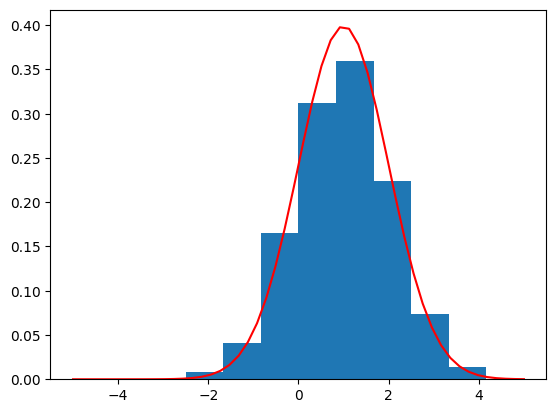

In [96]:
x_ = np.linspace(-5, 5, 50)
y_ = [p.subs(y, i) for i in x_]

peaks, bars, _ = plt.hist(f_arr, density=True, range=(-5, 5), bins=12)
plt.plot(x_, y_, color="red")

In [84]:
mx = np.mean(f_arr)
mu2 = np.mean([x*x for x in f_arr])
s2 = 1/(n - 1) * sum([(x - mx)**2 for x in f_arr])
Mx = a
Disp = sigma**2
print(mx, Mx)
print(s2, Disp)

0.9727222262379367 1
0.8695615312795472 1


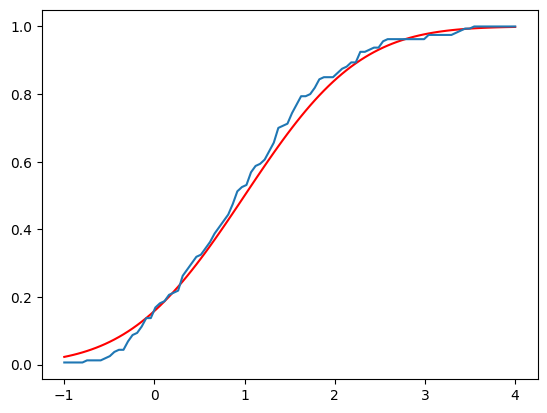

In [90]:
xmin = min(f_arr)
xmax = max(f_arr)
p_values = f_arr/sum(f_arr)

xx = np.linspace(int(xmin), int(xmax+1), 100)
Femp = np.empty(shape=100)
F = np.empty(shape=100)

j = 0
for i in xx:
    Femp[j] = len(p_values[f_arr<i])/len(p_values)
    j+=1

j = 0
for i in xx:
    F[j] = norm.cdf(i, loc=Mx, scale=sigma)
    j += 1

plt.plot(xx, F, color="red")
plt.plot(xx, Femp)

0.09675568900512374


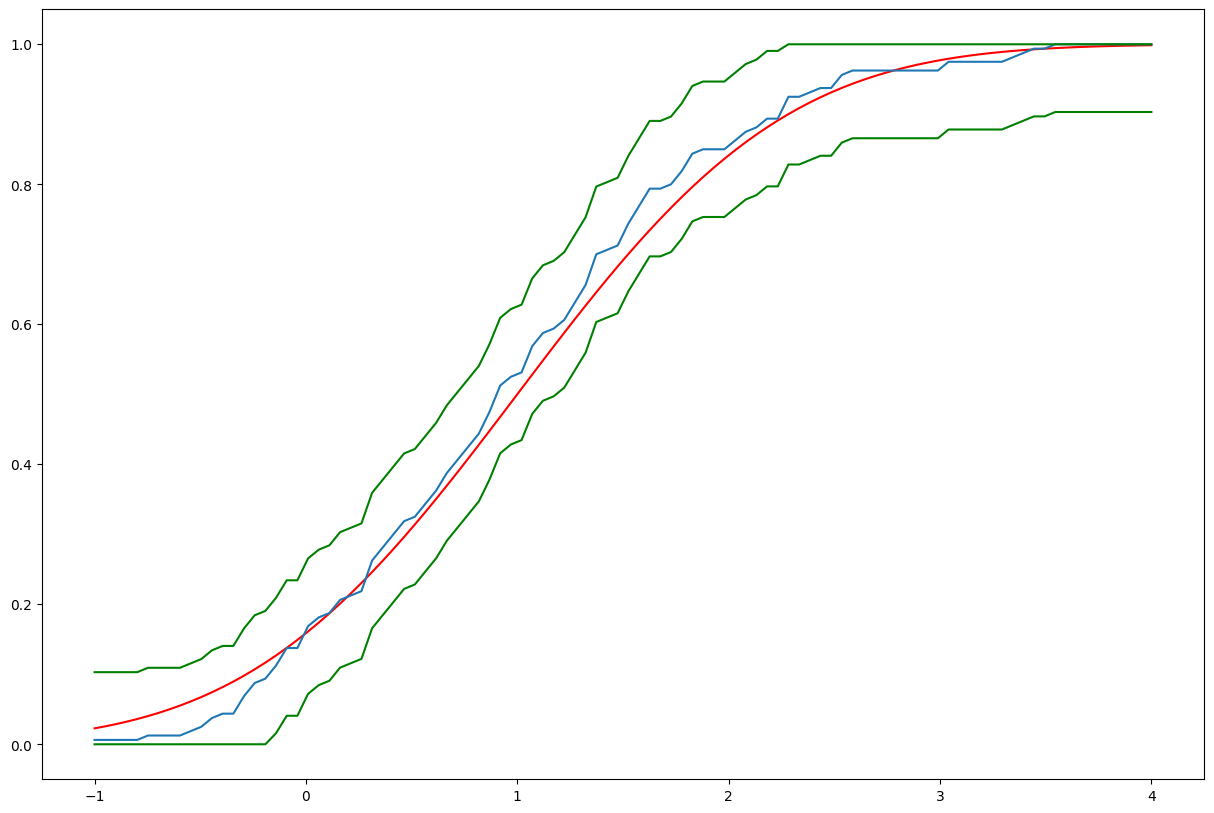

In [92]:
lmbd = 0.1
eps = (-1/(2*n)*math.log(lmbd/2))**0.5
print(eps)
Fsup = np.empty(shape=100)
Finf = np.empty(shape=100)
j = 0
for i in xx:
    if Femp[j] + eps < 1:
        Fsup[j] = Femp[j] + eps
    else:
        Fsup[j] = 1
    if Femp[j] - eps > 0:
        Finf[j] = Femp[j] - eps
    else:
        Finf[j] = 0
    j += 1
    
fig, ax = plt.figure(figsize=(15, 10)), plt.gca()
ax.plot(xx, F, color="red")
ax.plot(xx, Femp)
ax.plot(xx, Finf, color="green")
ax.plot(xx, Fsup, color="green")